<a href="https://colab.research.google.com/github/mohdasjadsheikh/Mobile-Price-Prediction/blob/main/MOBILE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<FONT COLOR=GREEN>PROJECT NAME : MOBILE PRICE PREDICTION<BR>PROJECT TYPE : CLASSIFICATION<BR>CONTRIBUTION : INDIVIDUAL<BR>NAME - MOHD ASJAD<BR>
COHORT - CHICAGO**

# **<font color='red'>PROBLEM STATEMENT**

---



<font color='BLUE'>**The key purpose of this research work is to determine "If the mobile with given features would be under a certain
price range." Specific feature selection algorithms are used to recognize and delete features that are less necessary and
redundant, and have minimal complexity in computation. Different classifiers are used to achieve the best possible accuracy.
Results are measured in terms of achieving the maximum accuracy and choosing the minimum features. Statement is made
based on the algorithm for best selection of features and best classifier for the given dataset. This work can be used to find
the optimal product (with minimum cost and maximum features) in any form of marketing and industry. It is suggested
that future work will extend this research and find a more sophisticated solution to the given problem and a more accurate
tool for estimating prices.**

# <font color="red"> **BUSSINESS CONTEXT**

**<font color="blue">Some Random Person wants to Established a mobile company. That Person wants to give tough fight to big Tech Giants like <font color="red">Apple, Samsung, Xiaomi etc.
<br>
<br><font color="blue">
That Person does not know how to estimate the price of mobiles. In this competitive Mobile Phone Market you cannot bet on Assumptions. To solve this problem that person decided to collects sales data of mobile phones of various companies across different ranges of Mobile Phones.
<br>
<br>
Now he/she wants to find out some relation between features of a mobile phone(<font color="green">eg:- RAM, Internal Memory, Processor, Camera, Display Features etc.)<font color="blue"> with its selling price. But that person is not so good at Machine Learning. So they needs your help to solve this problem.
<br>
<br>
In this problem We are not going to predict the actual price but a price range indicating how the Price Is Influenced or Segmented of a Mobile Phone in Relation With It's Specifications.**

# **<font color='red'>IMPORT RELEVANT LIBRARIES**

---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# **<font color='red'>IMPORT THE DATASET**

---



In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/New Piratedrive/data_mobile_price_range.csv')

In [ ]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<font color=red>**Analyze the data to price what are the price segments of Mobile phones present in this dataset**

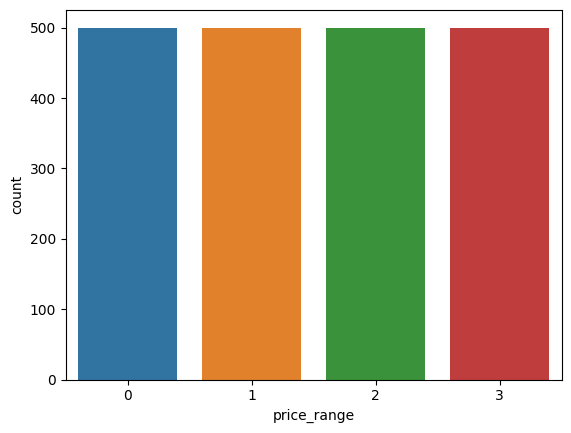

In [ ]:
sns.countplot(x ='price_range', data = train_data)
plt.show()

<font color=blue>**here we can see that our dataset is equallly distributed among four different categories**

#<font color=red>**Plotting the heatmap to find the correlation b/w specifications**

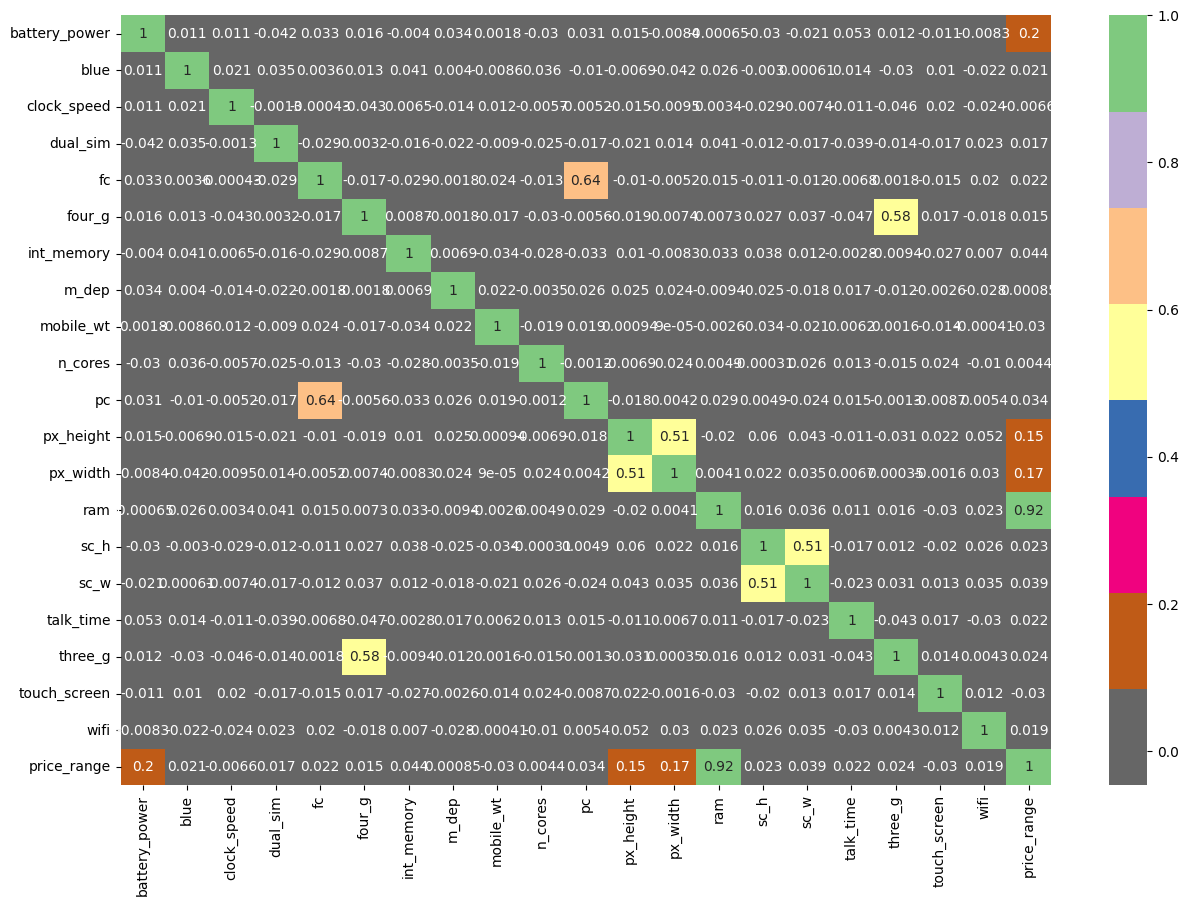

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

In [ ]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

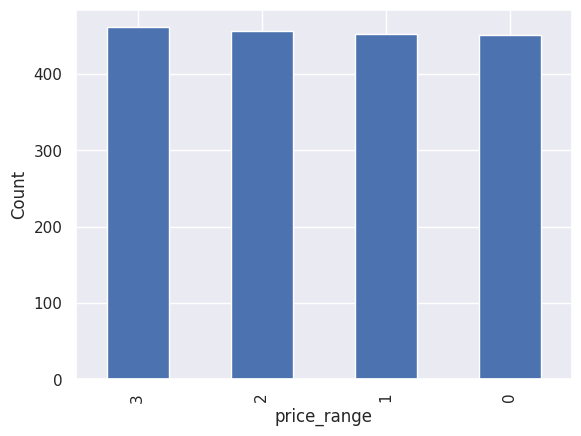

In [ ]:
#classes
sns.set()
price_plot=train_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

**So, the mobile phones are in 4 price ranges. The number of elements is almost similar.**

#<font color='red'> **Data Distribution**

**Let us analyse some data features and see their distribution.<br>
First, we see how the battery mAh is spread.**

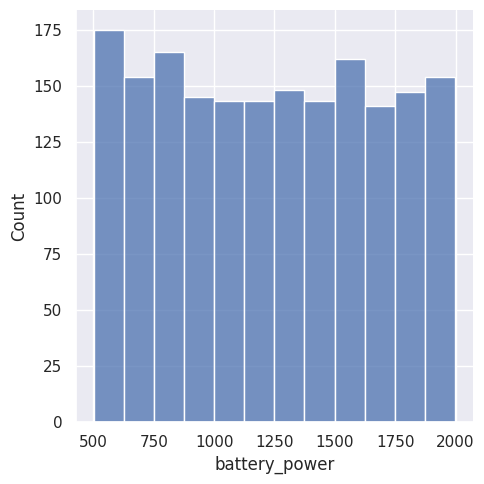

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

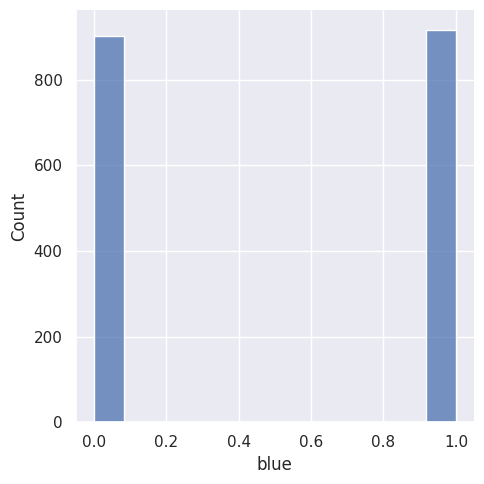

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

* **So, we can see that half the devices have Bluetooth, and half don’t.**

* **Next, we analyse the mobile depth/Thickness ( in cm).**

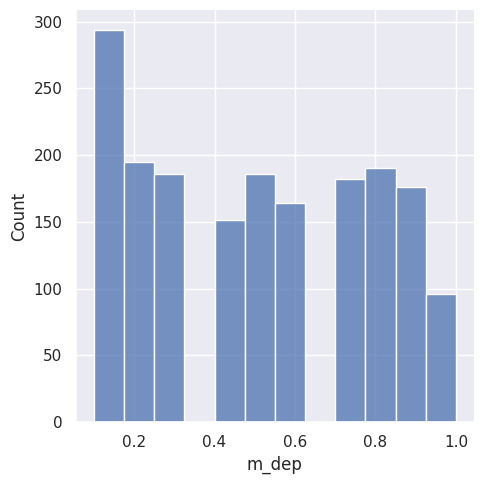

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

* <font color='red'>**A few mobiles are very thin and a few ones are almost a cm thick.**
* <font color=red>**In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple.**

*  <font color='red'>**Let us see if there are any missing values or missing data.}**

In [ ]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

<font color='red'>**Let us split the data**

In [ ]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

<font color='red'>**Now, we define a function for creating a confusion matrix**

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Reds')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

<font color='red'>**Now, as the function is defined, we can proceed with implementing the classification algorithms.**

# <font color='red'> **RANDOM FOREST CLASSIFIER**

---



* <font color='blue'> A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.

* <font color='blue'>A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.

* <font color='blue'>A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.

* <font color='blue'>The outcome is determined by the (random forest) algorithm based on the predictions of the decision trees. It forecasts by averaging or averaging the output of several trees. The precision of the outcome improves as the number of trees grows.

<font color='red'>**First we build the model**

In [ ]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

<font color='red'>**Now, Let's do the training and prediction.**

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
print(y_pred_rfc)

[0 2 2 3 2 3 1 1 0 0 1 2 2 0 2 1 2 3 2 2 3 2 0 0 1 1 1 3 3 0 0 0 3 3 1 3 3
 3 2 3 2 1 1 1 2 1 2 2 1 3 2 2 2 2 2 3 2 2 3 0 1 0 3 0 2 2 0 1 1 1 2 2 1 1
 2 1 2 0 2 3 2 2 1 3 1 2 3 2 1 3 3 1 2 1 1 0 0 2 0 1 0 2 1 3 1 0 0 0 0 1 1
 2 2 0 2 3 0 3 0 1 3 0 3 0 3 3 1 3 3 1 3 2 3 1 0 2 1 0 2 2 1 3 1 0 2 2 2 0
 0 2 3 0 0 3 0 0 0 2 1 3 3 2 3 0 2 3 1 2 0 1 3 0 3 1 3 0 1 2 0 0 2 3 0 3 3
 0 1 1 2 1 1 0 0 1 2 2 3 3 3 2 3 3 1 0 1 0 2 3 1 0 3 3 2 1 0 3 3 0 1 1 0 2
 3 1 2 3 0 0 0 0 2 0 1 3 3 0 1 3 0 3 1 1 3 1 3 0 0 0 1 2 1 3 1 3 1 1 1 1 2
 1 1 0 1 1 3 1 1 1 0 0 2 2 0 0 3 3 1 1 1 1 1 0 2 2 2 0 0 0 3 3 1 1 2 2 0 2
 2 2 3 1 3 3 2 0 1 2 0 1 3 0 1 2 3 3 3 0 3 2 0 3 0 2 1 2 3 0 0 2 3 0 3 0 0
 2 0 0 2 0 2 2 2 2 3 1 1 0 0 3 0 2 3 1 3 2 1 1 0 1 1 2 0 1 0 0]


<font color='red'>**Let us apply the function for the accuracy metrics**

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



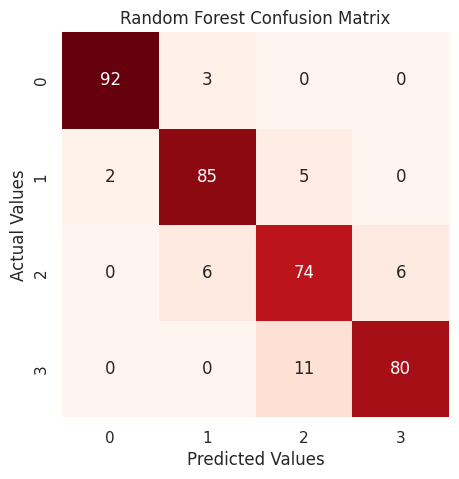

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

<font color='red'>**Now, we can see that the Random Forest algorithm has good accuracy in prediction.**

# **<font color='red'> Naive Bayes**

---



<font color='blue'>**Conditional probability is the foundation of Bayes’ theorem. The conditional probability aids us in assessing the likelihood of something occurring if something else has previously occurred.**

# <font color='red'> **Gaussian Naive Bayes**

---


<font color='blue'>**It is a Naive Bayes variation that allows continuous data and follows the Gian normal distribution. The Bayes theorem is the foundation of a family of supervised machine learning classification algorithms known as naive Bayes. It is a basic categorization approach with a lot of power. When the dimensionality of the inputs is high, they are useful. The Naive Bayes Classifier may also be used to solve complex classification issues**.

* **Let us implement the Gaussian NB classifier**.


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

<font color='red'>**Now, we perform the training and prediction.**

In [ ]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)
print(y_pred_gnb)

[0 2 2 3 2 3 2 1 0 0 1 2 1 0 3 1 3 3 2 3 3 2 0 1 1 1 1 3 3 1 0 0 3 3 0 3 3
 3 2 3 2 1 2 1 2 1 2 2 1 3 2 2 2 2 2 3 2 2 3 0 1 0 3 0 2 1 0 1 1 1 2 2 0 1
 2 2 2 0 2 3 2 2 2 3 1 1 3 3 1 3 3 1 2 1 1 0 0 2 0 1 0 3 1 3 1 0 0 0 0 2 1
 2 2 0 2 3 0 3 0 1 3 0 3 0 3 3 1 3 3 1 3 2 3 1 0 2 1 1 2 2 0 3 1 0 2 3 2 0
 0 2 3 0 0 3 0 0 0 2 1 3 3 2 3 0 2 3 1 2 0 1 3 0 3 1 3 0 1 2 0 0 2 3 0 3 3
 0 1 1 2 1 1 0 0 1 2 3 3 3 3 2 2 3 1 0 1 0 2 3 1 0 2 3 2 1 0 3 2 0 1 2 0 3
 2 0 2 3 0 0 0 0 3 0 1 3 3 1 0 3 1 3 1 2 3 0 2 0 0 0 2 2 1 2 1 3 1 1 2 1 2
 1 2 0 0 2 3 1 2 1 0 0 3 2 0 0 3 3 1 1 1 1 2 0 2 2 2 0 0 0 3 3 1 1 1 2 0 3
 1 2 3 1 3 3 2 0 2 1 0 2 3 0 2 2 2 3 3 0 3 2 0 3 0 2 0 2 3 0 1 3 3 0 3 0 0
 2 1 0 3 0 2 2 2 2 3 1 1 1 0 3 0 2 3 1 3 2 1 1 0 1 1 1 0 1 0 0]


<font color='red'>**Now, we can check the accuracy.**

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



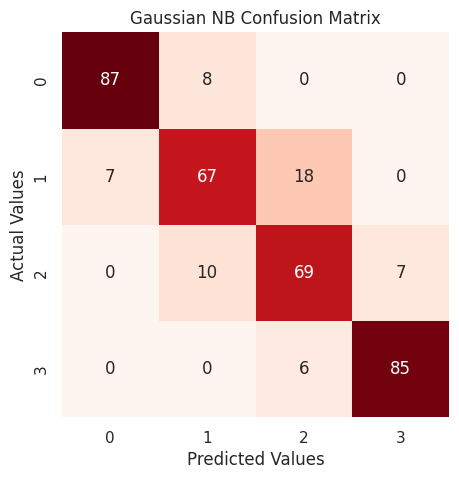

In [ ]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

<font color='red'>**We can see that the model is performing well.**

# <font color='red'>**KNN Classifier**

---



<font color='blue'>**The K Nearest Neighbor method is a type of supervised learning technique that is used for classification and regression. It’s a flexible approach that may also be used to fill in missing values and resample datasets. K Nearest Neighbor examines K Nearest Neighbors (Data points) to forecast the class or continuous value for a new Datapoint, as the name indicates.**

# <font color='red'>**The KNN method**

---



<font color='blue'>**saves all available data and classifies a new data point based on its similarity to the existing data. This implies that fresh data may be quickly sorted into a well-defined category using the K-NN method. The K-NN algorithm is a non-parametric algorithm, which means it makes no assumptions about the underlying data. It’s also known as a lazy learner algorithm since it doesn’t learn from the training set right away; instead, it saves the dataset and performs an action on it when it comes time to classify it.**

*  <font color='green'>**Let us perform the implementation of the classifier.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
print(knn)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)


**<font color='red'>Now, we train the data and make our predictions.**

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)
print(y_pred_knn)

[0 2 2 3 2 3 1 2 0 0 1 2 2 0 2 1 2 3 2 3 3 2 0 0 1 1 1 3 3 0 0 0 3 3 1 3 3
 3 2 3 2 1 1 1 2 1 2 2 1 3 1 2 2 2 1 3 2 2 3 0 1 0 3 0 3 2 0 1 1 1 2 2 0 1
 2 1 2 0 2 2 2 2 1 2 1 2 3 2 1 3 3 1 2 1 2 0 0 2 0 1 0 3 1 3 0 0 0 0 0 1 1
 2 2 0 1 3 0 3 0 1 3 0 3 0 3 3 1 3 3 1 3 2 3 1 0 2 1 1 2 2 1 3 1 0 2 2 3 0
 0 2 3 0 0 3 0 0 0 2 1 3 3 2 3 0 2 3 1 2 0 2 3 0 3 1 3 0 1 2 0 0 2 3 0 3 3
 0 1 1 2 1 1 0 0 1 2 2 3 3 3 2 3 3 1 0 1 0 2 3 1 0 2 2 2 1 0 3 3 0 1 1 0 2
 3 1 2 3 0 0 0 0 2 0 1 3 3 0 0 3 0 2 1 1 3 1 3 0 0 0 1 2 1 3 1 3 1 1 2 1 2
 1 1 0 1 1 3 1 1 1 0 0 2 2 0 0 3 3 1 1 1 1 1 0 2 2 2 0 0 0 3 3 1 1 1 2 0 2
 2 2 3 1 3 3 2 0 1 1 0 1 3 0 1 2 3 3 3 0 3 2 0 3 0 2 1 2 3 0 1 3 3 0 3 0 0
 2 0 0 2 0 2 3 1 1 3 2 1 1 0 3 0 2 3 1 3 2 1 1 0 1 1 2 0 1 0 0]


<font color='red'>**Now, we check the accuracy**

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



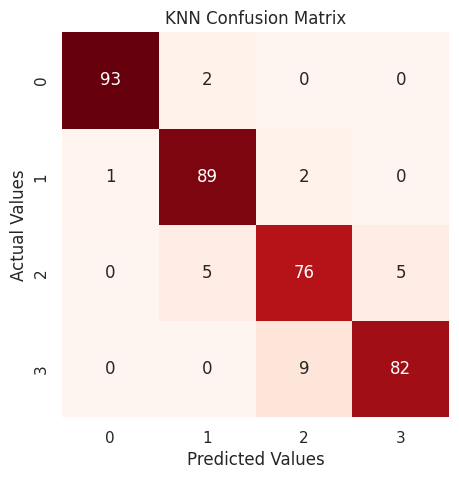

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

<font color='red'>**The KNN classifier is quite adept at its task.**

# **<font color='red'>SVM Classifier**

---



*  <font color='blue'>**Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification purposes.**

*  <font color='blue'>**The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.**

**<font color='red'> Let us do the implementation of SVM.**

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

In [ ]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

**<font color='red'> Now, we check the accuracy.**

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



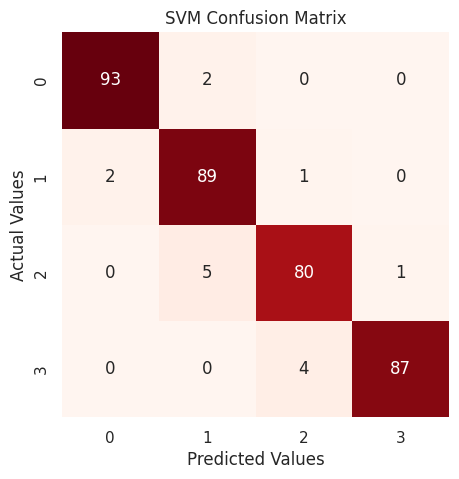

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

###**<font color='red'> We can see that the SVM classifier is giving the best accuracy.**

#<font color='red'> **Conclusion**

---
<font color='green'> **In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.**